In [42]:
import requests as rq
import pandas as pd
import numpy as np
import datetime as dt
import traceback as tb
from scipy import optimize as op

In [12]:
# get daily time series data from covid19india
resp = rq.get("https://api.covid19india.org/data.json")
ts = resp.json()['cases_time_series']

r = {
    "date": [],
    "confirmed": [],
    "deceased": [],
    "recovered": []
}

for d in ts:
    try:
        r['date'].append(dt.datetime.strptime(d['date'] + "2020", '%d %B %Y'))
        r['confirmed'].append(int(d['dailyconfirmed']))
        r['deceased'].append(int(d['dailydeceased']))
        r['recovered'].append(int(d['dailyrecovered']))
    except Exception as e:
        print(d['date'])
        tb.print_exc()

df = pd.DataFrame(r)
df.sort_values('date', inplace=True)

In [13]:
df.head()

,date,confirmed,deceased,recovered
0,2020-01-30,1,0,0
1,2020-01-31,0,0,0
2,2020-02-01,0,0,0
3,2020-02-02,1,0,0
4,2020-02-03,1,0,0


In [38]:
fdf = df[37:][:]
fdf.head()

,date,confirmed,deceased,recovered
37,2020-03-07,3,0,0
38,2020-03-08,5,0,0
39,2020-03-09,9,0,0
40,2020-03-10,15,0,1
41,2020-03-11,8,0,0


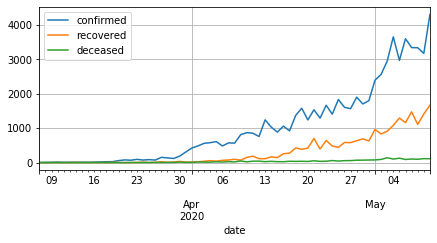

In [39]:
fdf.plot(
    x='date',
    y=['confirmed', 'recovered', 'deceased'],
    figsize=(7,3),
    grid=True
)

In [30]:
fdf['r0'] = fdf['confirmed'] / fdf['confirmed'].shift(1, fill_value=1)
fdf['sma_r0'] = fdf['r0'].rolling(7, min_periods=1, center=True).mean().rolling(7, min_periods=1, center=True).mean()
fdf.head()

,date,confirmed,deceased,recovered,r0,sma_r0
37,2020-03-07,3,0,0,3.000000,1.744742
38,2020-03-08,5,0,0,1.666667,1.653413
39,2020-03-09,9,0,0,1.800000,1.574489
40,2020-03-10,15,0,1,1.666667,1.509952
41,2020-03-11,8,0,0,0.533333,1.375006


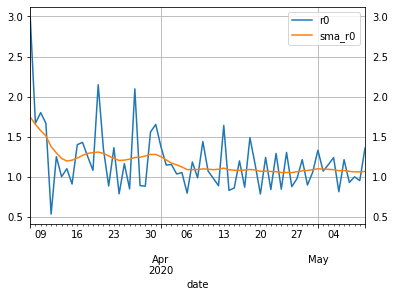

In [35]:
ax = fdf.plot(
    x='date',
    y=['r0', 'sma_r0'],
    grid=True
)
ax.tick_params(labeltop=False, labelright=True)

In [68]:
# define a simple function
def y(x, a, b):
    return a * x * x + b

# generate multiplier between 0.9 and 1.1 to produce test data for fitting
import random
def m():
    return 0.9 + 0.2 * random.random()

test_data = [2 * x * x * m() + 10 for x in range(10)] # so a=2 and b=10 in test data
print("actual output:", [f"{y(i, 2, 10):0.2f}" for i in range(10)])
print("values to fit:", [f"{i:0.2f}" for i in test_data])

# fit test data to function and try to find params
out = op.curve_fit(y, np.arange(10), test_data)
print ("param:", out[0])
print ("covar:\n", out[1])

actual output: ['10.00', '12.00', '18.00', '28.00', '42.00', '60.00', '82.00', '108.00', '138.00', '172.00']
values to fit: ['10.00', '11.96', '17.74', '28.14', '44.11', '62.38', '88.45', '116.63', '139.77', '178.88']
param: [ 2.08587851 10.35996481]
covar:
 [[ 7.76771438e-04 -2.21379864e-02]
 [-2.21379864e-02  1.19102373e+00]]
